In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import scipy.signal
from scipy.signal import butter, filtfilt, wiener

In [4]:
file_path = "filtertest.wav"
audio, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate

# Get basic info
duration = librosa.get_duration(y=audio, sr=sr)
num_samples = len(audio)

print("Num Samples:", num_samples, "\nSampling Rate:", sr, "\nDuration:", duration)

Num Samples: 171520 
Sampling Rate: 8000 
Duration: 21.44


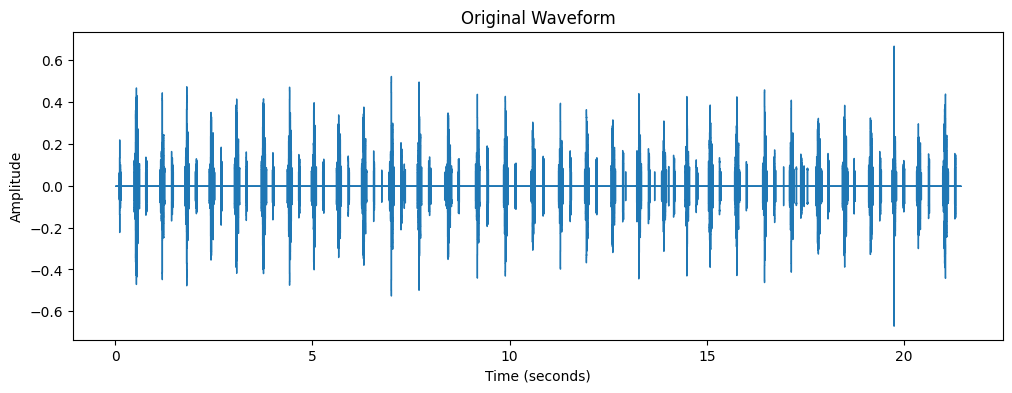

C:\temp\ipykernel_19988\754279348.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='inferno')


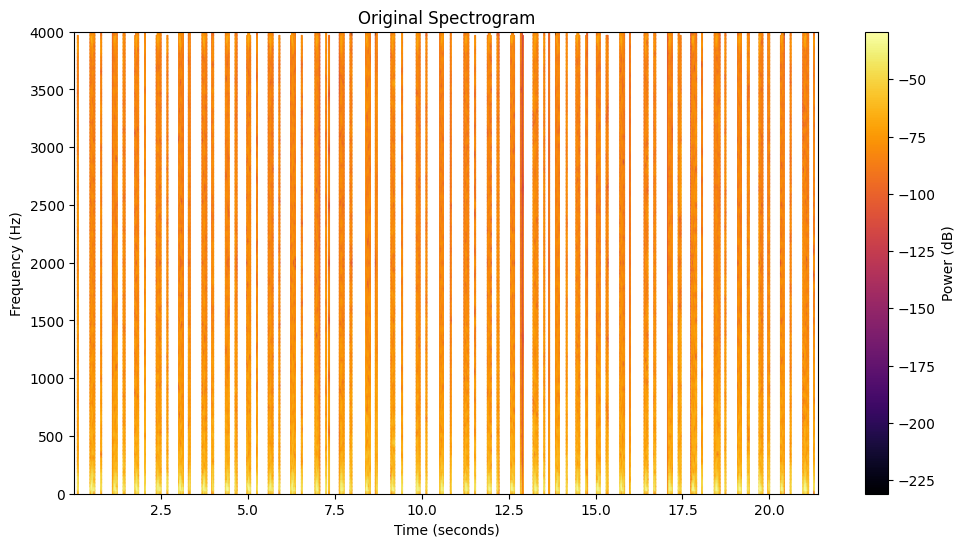

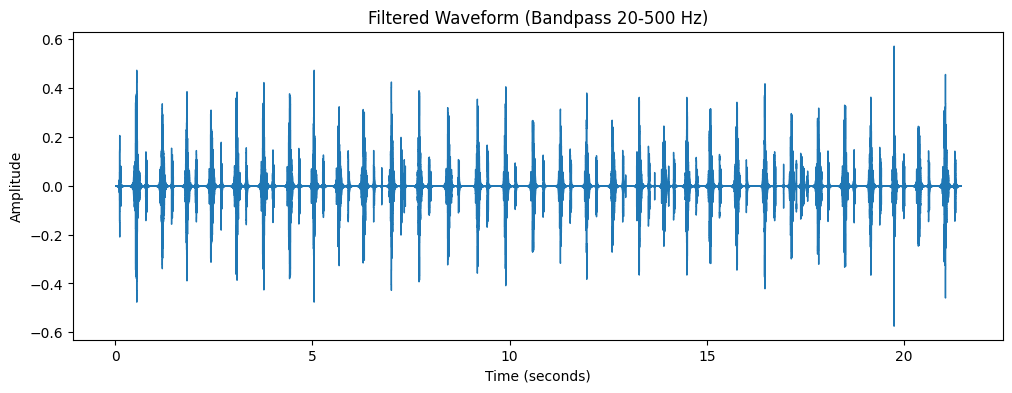

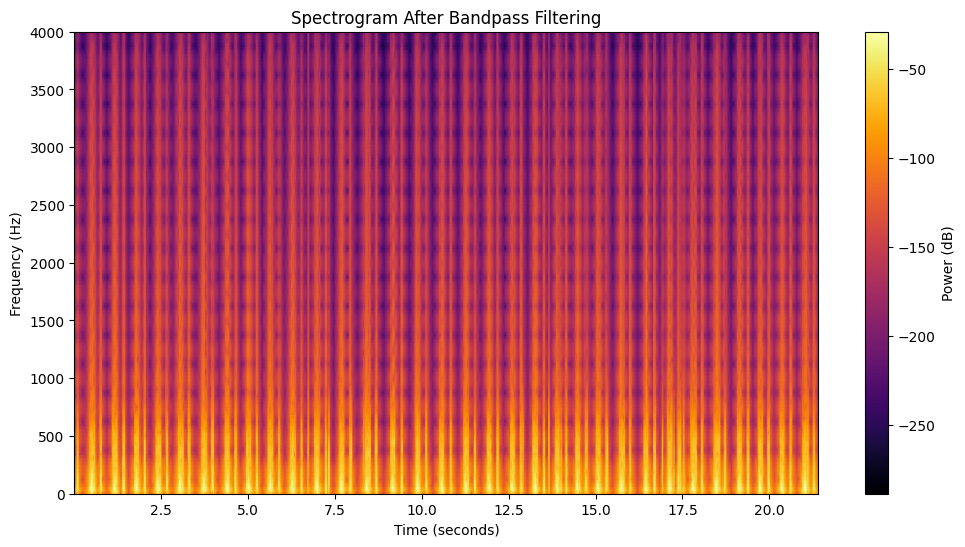

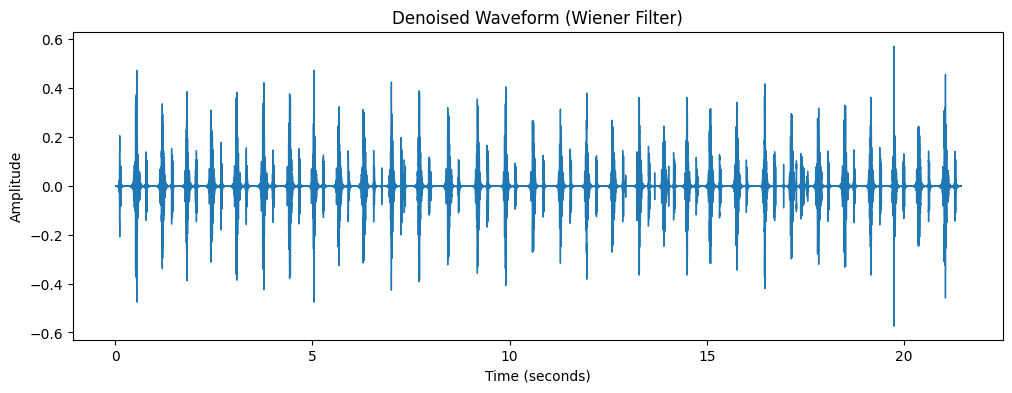

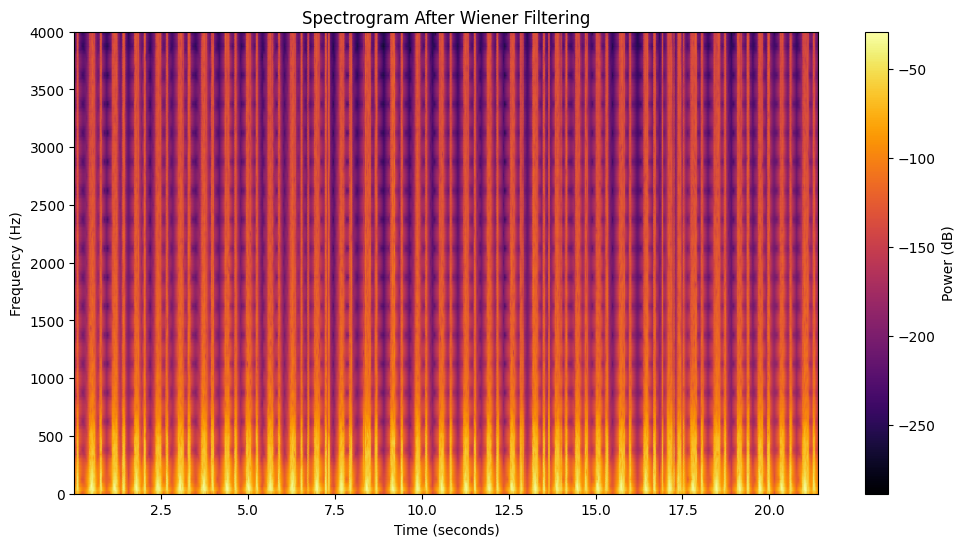

Denoised audio saved as denoised_heartbeat.wav


In [5]:
file_path = "filtertest.wav"
audio, sr = librosa.load(file_path, sr=None)

def plot_waveform(audio, sr, title):
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(12, 6))
    frequencies, times, Sxx = scipy.signal.spectrogram(audio, fs=sr, nperseg=256)
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='inferno')
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hz)")
    plt.title(title)
    plt.colorbar(label="Power (dB)")
    plt.show()

# Plot original waveform and spectrogram
plot_waveform(audio, sr, "Original Waveform")
plot_spectrogram(audio, sr, "Original Spectrogram")

# Bandpass filter (20-500 Hz)
def bandpass_filter(audio, lowcut, highcut, sr, order=5):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return filtfilt(b, a, audio)

filtered_audio = bandpass_filter(audio, lowcut=20, highcut=500, sr=sr)
plot_waveform(filtered_audio, sr, "Filtered Waveform (Bandpass 20-500 Hz)")
plot_spectrogram(filtered_audio, sr, "Spectrogram After Bandpass Filtering")

# Apply Wiener filter
denoised_audio = wiener(filtered_audio)
plot_waveform(denoised_audio, sr, "Denoised Waveform (Wiener Filter)")
plot_spectrogram(denoised_audio, sr, "Spectrogram After Wiener Filtering")

# Save the cleaned audio file
sf.write("denoised_heartbeat.wav", denoised_audio, sr)
print("Denoised audio saved as denoised_heartbeat.wav")
